In [4]:
%run ../aux_funcs.py
%run ../RSRG.py
%run ../RSRG_class.py
import time
from sympy import Matrix
import matplotlib.pyplot as plt

In [24]:
L = 3
steps = int(0.99*L*L)
a, b = 0.1, 0.105
measure_step = 30

ind_dict, adj_ind = triangle_lattice_dictionary(L)
nn_ind = triangle_nn_indices(L)
nnn_ind = triangle_nnn_indices(L)

measure_list = np.floor(steps*(1/(1.1**np.arange(1,60))))
measure_list = measure_list.astype(int)
check_list = np.floor(L*L*(1- 1/(1.6**np.arange(10))))

runs = 1

In [25]:
def chunk_retainer(ind_array, size):
    eye_diag = np.ones(size)
    eye_diag[ind_array] = 0
    eye_diag = 1 - eye_diag
    return sparse.diags(eye_diag)

ret_2 = chunk_retainer([1], L*L)

In [26]:
J_ij_vals = fill_J_ij_matrix(L*L, nn_ind, nnn_ind, a, b)
h_vals = np.exp(-np.random.exponential(size=L*L))

In [32]:
t0 = time.time()

Omega = J_ij_vals.max()
r_ind, c_ind, J_ij = sparse.find(J_ij_vals) 
J_ind = np.where(J_ij == Omega)[0][0]
i, j = r_ind[J_ind], c_ind[J_ind]

h_vals[i] = h_vals[i]*h_vals[j]/Omega    
h_vals[j] = 0

update_adjacency_J_ij(adj_ind, i, j)

J_ij_vals[i,adj_ind[i]] = J_ij_vals[i, adj_ind[i]].maximum(J_ij_vals[j, adj_ind[i]])
J_ij_vals[adj_ind[i], i] = J_ij_vals[i,adj_ind[i]]

eye = chunk_deleter([j], L*L)
J_ij_vals = eye @ J_ij_vals @ eye


#J_ij_vals[j,adj_ind[j]] = 0
#J_ij_vals[adj_ind[j],j] = 0

print(time.time()-t0)

0.008511066436767578


In [33]:
Matrix(J_ij_vals.toarray())

Matrix([
[0, 0,                    0,                    0,                    0,                    0,                    0,                    0,                    0],
[0, 0,                    0,                    0,                    0,                    0,                    0,                    0,                    0],
[0, 0,                    0, 0.000775434699013936,  1.41584840070953e-5,  1.16119127923219e-5,  6.68552884292801e-6,  0.00030178201795009, 0.000636273758271303],
[0, 0, 0.000775434699013936,                    0, 0.000156326868914371, 0.000114916788813099,  8.20204129469457e-5,  8.03629892676171e-6,  0.00065693531768243],
[0, 0,  1.41584840070953e-5, 0.000156326868914371,                    0, 0.000338762499131888, 0.000101119743834235, 0.000182940266222783, 0.000349209591758128],
[0, 0,  1.16119127923219e-5, 0.000114916788813099, 0.000338762499131888,                    0,  7.16707625346196e-6, 0.000293320647764328, 0.000478178735354728],
[0, 0,  6.685528842

(array([1010., 1020.,  955.,  976., 1004., 1069.,  990., 1001.,  995.,
         980.]),
 array([0.10001412, 0.11001167, 0.12000923, 0.13000679, 0.14000434,
        0.1500019 , 0.15999945, 0.16999701, 0.17999457, 0.18999212,
        0.19998968]),
 <BarContainer object of 10 artists>)

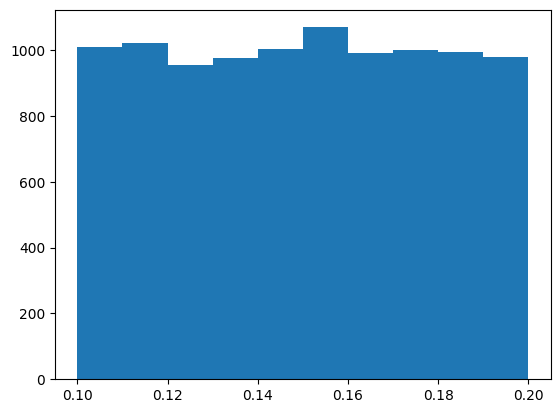

In [42]:
a,b = 0.1, 0.1


samples = a+b-np.exp(-np.random.exponential(size=(10000)))*b
plt.hist(samples)

In [4]:
Omega_list_composite = np.array([])
decimation_type_composite = np.array([], dtype=bool)

In [58]:
w_vals = np.array([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5])
L8 = np.array([16.84, 12.7, 8.82, 6.65, 4.68, 3.31, 3.22, 2.36, 1.91, 2.0])/(8**2)
L10 = np.array([27.12, 21.27, 14.69, 11.54, 7.29, 4.39, 3.01, 2.69, 2.8, 2.03])/10**2
L16 = np.array([68.62, 50.82, 34.66, 23.07, 13.87, 8.91, 5.34, 3.75, 2.78, 2.86])/16**2
L20 = np.array([110.14, 81.84, 54.2, 34.48, 19.56, 9.27, 6.24, 4.64, 0, 0])/20**2
L6 = np.array([9.87, 7.51, 5.3, 4.44, 3.16, 2.72, 2.33, 1.7, 1.86, 1.6])/6**2
L12 = np.array([39.1, 28.5, 21.58, 13.88, 9.41, 5.8, 3.9, 3.2, 2.81, 2.31])/12**2

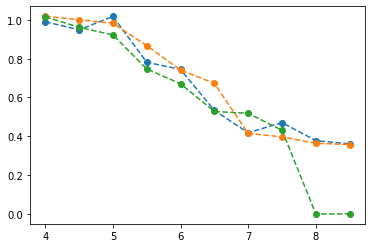

In [59]:
#plt.scatter(w_vals, L8)
plt.plot(w_vals, L12/L6, linestyle='--', marker='o')
plt.plot(w_vals, L16/L8, linestyle='--', marker='o')
plt.plot(w_vals, L20/L10, linestyle='--', marker='o')

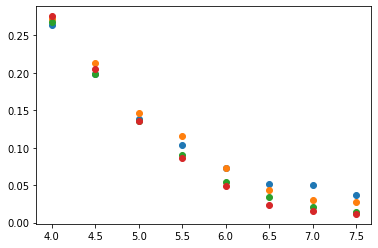

In [55]:

plt.scatter(w_vals, L8)
plt.scatter(w_vals, L10)
plt.scatter(w_vals, L16)
plt.scatter(w_vals, L20)